In [5]:
import pandas as pd
import os
import numpy as np
from google.colab import drive 
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/FDPD4/FDP-ML2DL')
print(os.getcwd())
!ls "/content/drive/My Drive/FDPD4/FDP-ML2DL/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/FDPD4/FDP-ML2DL
 Association.ipynb		     K-Means-Mall-Customers.ipynb
 Assocition_Example.ipynb	     Mall_Customers.csv
'Copy of Association.ipynb'	     Market_Basket_Optimisation.csv
'Copy of Assocition_Example.ipynb'   URL.txt
 K-Means-inaction.ipynb


In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# %matplotlib inline



In [0]:
plt.rcParams['figure.figsize'] = [12, 6]

In [8]:
orders_data = pd.read_csv('Dataset.csv')
orders_data.head()

,Unnamed: 0,Customer.ID,Customer.Name,Customer Type,Country,Sales,Quantity,Profit,Shipping.Cost
0,1,RH-19490,Jeremy J,Consumer,United States,2234.650,9,809.8300,976.77
1,2,JW-15220,Jane Waco,Corporate,United States,5083.960,5,1906.4850,867.69
2,3,JH-15985,Joseph Holt,Consumer,United States,4297.644,13,-1862.3124,865.74
3,4,GM-14695,Greg Maxwell,Corporate,United States,4164.050,5,83.2810,846.54
4,5,TB-21175,Thomas Boland,Corporate,United States,2249.910,9,517.4793,780.70


In [9]:
X = np.array(orders_data)
X.shape

(9993, 9)

In [10]:
cutomer_leve_agg = orders_data.groupby('Customer.ID', as_index=False).agg({"Sales": "sum", "Quantity": "sum", "Profit": "sum", "Shipping.Cost": "sum"})
type(cutomer_leve_agg)

pandas.core.frame.DataFrame

In [11]:
cutomer_leve_agg.describe()

,Sales,Quantity,Profit,Shipping.Cost
count,794.000000,794.000000,794.000000,794.000000
mean,2893.076751,47.697733,360.747401,300.021385
std,2627.568862,24.865932,894.038222,257.742402
min,4.833000,2.000000,-6626.389500,0.400000
25%,1146.732500,30.000000,36.479075,115.570000
50%,2248.897500,44.000000,227.636100,229.540000
75%,3780.552500,63.000000,559.624350,393.660000
max,25043.050000,150.000000,8981.323900,1584.080000


In [0]:
cols = cutomer_leve_agg.shape[1]
# cutomer_leve_agg = cutomer_leve_agg.iloc[: , 1:cols+1].values

# Slaes and Profit 
cutomer_leve = cutomer_leve_agg.iloc[:, [1,3]].values


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ab9b1518>,
      dtype=object)

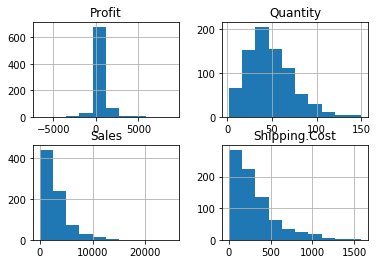

In [13]:
cutomer_leve_agg.hist(bins=10)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
mms = MinMaxScaler()
mms.fit(cutomer_leve)
data_transformed = mms.transform(cutomer_leve)

In [0]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

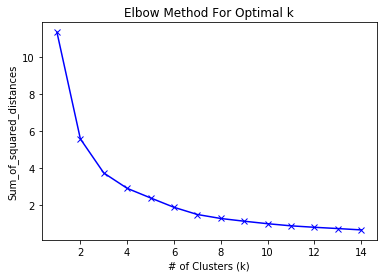

In [17]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('# of Clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
# Optimal Clusters are Choosen for sales and profit is 3


In [0]:
#Cluster the data
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_pred = kmeans.fit_predict(cutomer_leve)

In [19]:
# y_pred
type(y_pred)

numpy.ndarray

In [20]:
type(cutomer_leve)

numpy.ndarray

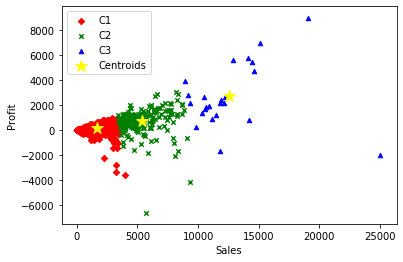

In [21]:
# Clusters assignment
plt.scatter(cutomer_leve[y_pred == 0, 0], cutomer_leve[y_pred == 0, 1], s = 20, c = 'red', label = 'C1', marker='D')
plt.scatter(cutomer_leve[y_pred == 1, 0], cutomer_leve[y_pred == 1, 1], s = 20, c = 'green', label = 'C2', marker='x')
plt.scatter(cutomer_leve[y_pred == 2, 0], cutomer_leve[y_pred == 2, 1], s = 20, c = 'blue', label = 'C3', marker='^')
# plt.scatter(cutomer_leve[y_pred == 3, 0], cutomer_leve[y_pred == 3, 1], s = 20, c = 'black', label = 'C3', marker='v')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids', marker='*')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()

In [22]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1673.74609047   147.59260121]
 [ 5332.92016632   708.00601917]
 [12587.41058333  2692.80599167]]


<h2>case - 2</h2>

In [0]:
case_2 = cutomer_leve_agg.loc[(cutomer_leve_agg['Profit'] > 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31ab8347f0>,
      dtype=object)

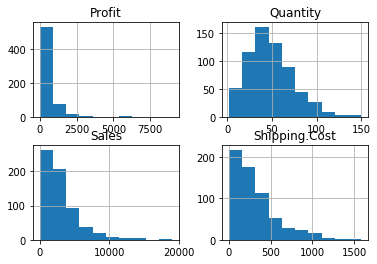

In [24]:
case_2.hist(bins=10)

In [0]:
# Slaes and Profit 
cutomer_leve_sal_pro_case2 = case_2.iloc[:, [1,3]].values

In [26]:
cutomer_leve_sal_pro_case2.shape

(638, 2)

In [0]:
mms = MinMaxScaler()
mms.fit(cutomer_leve_sal_pro_case2)
data_transformed = mms.transform(cutomer_leve_sal_pro_case2)

In [0]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

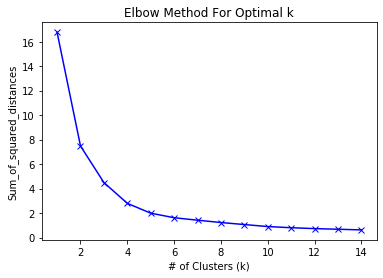

In [30]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('# of Clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#Cluster the data
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_pred = kmeans.fit_predict(cutomer_leve_sal_pro_case2)


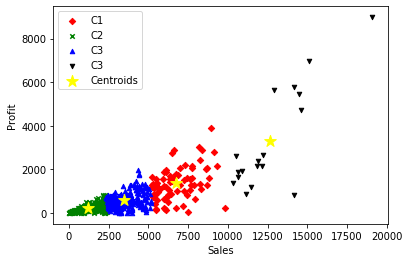

In [32]:
# Clusters assignment
plt.scatter(cutomer_leve_sal_pro_case2[y_pred == 0, 0], cutomer_leve_sal_pro_case2[y_pred == 0, 1], s = 20, c = 'red', label = 'C1', marker='D')
plt.scatter(cutomer_leve_sal_pro_case2[y_pred == 1, 0], cutomer_leve_sal_pro_case2[y_pred == 1, 1], s = 20, c = 'green', label = 'C2', marker='x')
plt.scatter(cutomer_leve_sal_pro_case2[y_pred == 2, 0], cutomer_leve_sal_pro_case2[y_pred == 2, 1], s = 20, c = 'blue', label = 'C3', marker='^')
plt.scatter(cutomer_leve_sal_pro_case2[y_pred == 3, 0], cutomer_leve_sal_pro_case2[y_pred == 3, 1], s = 20, c = 'black', label = 'C3', marker='v')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids', marker='*')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()

In [33]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 6747.73316104  1354.34612338]
 [ 1226.25343662   208.95135415]
 [ 3475.59137752   580.26138991]
 [12670.94372222  3287.59521111]]
